# Example of using XGBoost

[XGBoost](https://en.wikipedia.org/wiki/XGBoost) is a powerful tree based algorithm that can be used for classification and regression and it can sometimes do better than random forrest. Similar to random forrest, we can get ranking of features importance. 

This [video](https://www.youtube.com/watch?v=OtD8wVaFm6E) gives a visual explanation of how the algorithm works but it is at a very slow pace.

This is a very simple example to show these concepts on scikit-learn datasets.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, r2_score

## Loading wine dataset

In [2]:
wine = datasets.load_wine()
x = pd.DataFrame(wine['data'], columns = wine['feature_names'])
y = wine['target']

.. and split into train and test:

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Data preprocessing

To use XGBoost, the dataframe needs to be transformed into XGBoosts data structure:

In [4]:
Data_train = xgb.DMatrix(x_train, y_train)
Data_test  = xgb.DMatrix(x_test, y_test)

## Setting up the XGBoost model

Need to setup the hyper-parameters for the model:


In [5]:
parameters = {"max_depth" : 3, "eta" : 0.1, "objective" : "multi:softmax", "num_class" : 3}

iterations = 100

model = xgb.train(parameters, Data_train, iterations)

## Evaluation on test dataset

In [6]:
preds = model.predict(Data_test)

acc = accuracy_score(y_test, preds)

print("Accuracy of the XGBoost model on the test dataset:" + str(acc))

Accuracy of the XGBoost model on the test dataset:1.0


## Feature importance

Not done here, but to identify the features that we need to keep if we wanted to select the features, we could add a random feature and remove any feature that scored lower than the random one.

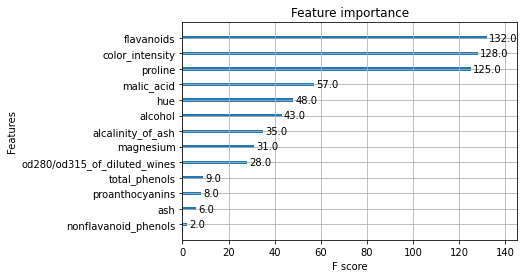

In [7]:
xgb.plot_importance(model);

## Loading diabetes dataset

Almost repeating the same for a regression example:

In [8]:
diabetes = datasets.load_diabetes()
x = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
y = diabetes['target']

. and split into train and test:

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

... similar pre-processing:

In [10]:
Data_train = xgb.DMatrix(x_train, y_train)
Data_test  = xgb.DMatrix(x_test, y_test)

## Setting up the model

In [11]:
parameters = {"max_depth" : 3, "eta" : 0.05, "gamma": 0.1, "objective" : "reg:squarederror"}

iterations = 100

model_r = xgb.train(parameters, Data_train, iterations)

## Evaluation on test dataset

In [12]:
preds = model_r.predict(Data_test)

r2 = r2_score(y_test, preds)

print("R2 score of the regression on the test dataset:" + str(r2))

R2 score of the regression on the test dataset:0.5384895188159831


## Feature importance

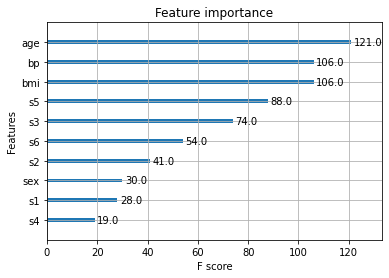

In [13]:
xgb.plot_importance(model_r);